In [9]:
from pathlib import Path

from geo_kpe_multidoc import GEO_KPE_MULTIDOC_CACHE_PATH


# Graphics
import matplotlib.pyplot as plt
import seaborn
from pysal.viz import splot
from splot.esda import plot_moran
import contextily
import matplotlib
import geopandas as gpd
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


In [10]:
def load_md_coordinates():
    coordinates_file_path = Path(GEO_KPE_MULTIDOC_CACHE_PATH).joinpath(
        "MKDUC01-topic-doc-coordinates-mordecai3-geopandas-20230615.parquet"
    )

    # topic_doc_coordinates = (
    #     gpd.read_parquet(coordinates_file_path)
    #     .drop(["location", "x", "y", "n"], axis=1)
    #     .set_index(["topic_id", "doc"])
    # )
    # topic_doc_coordinates.columns = ["_geometry"]
    # return topic_doc_coordinates
    return gpd.read_parquet(coordinates_file_path)

coordinates = load_md_coordinates()
coordinates.head(5)

,topic_id,doc,location,x,y,n,geometry
0,d59,LA072089-0140,"[42.00027, -93.50049]",-93.50049,42.00027,4,POINT (-93.50049 42.00027)
1,d59,LA072089-0140,"[39.76, -98.5]",-98.50000,39.76000,2,POINT (-98.50000 39.76000)
2,d59,LA072089-0140,"[39.73915, -104.9847]",-104.98470,39.73915,3,POINT (-104.98470 39.73915)
3,d59,LA072089-0140,"[39.95238, -75.16362]",-75.16362,39.95238,1,POINT (-75.16362 39.95238)
4,d59,LA072089-0140,"[41.85003, -87.65005]",-87.65005,41.85003,5,POINT (-87.65005 41.85003)


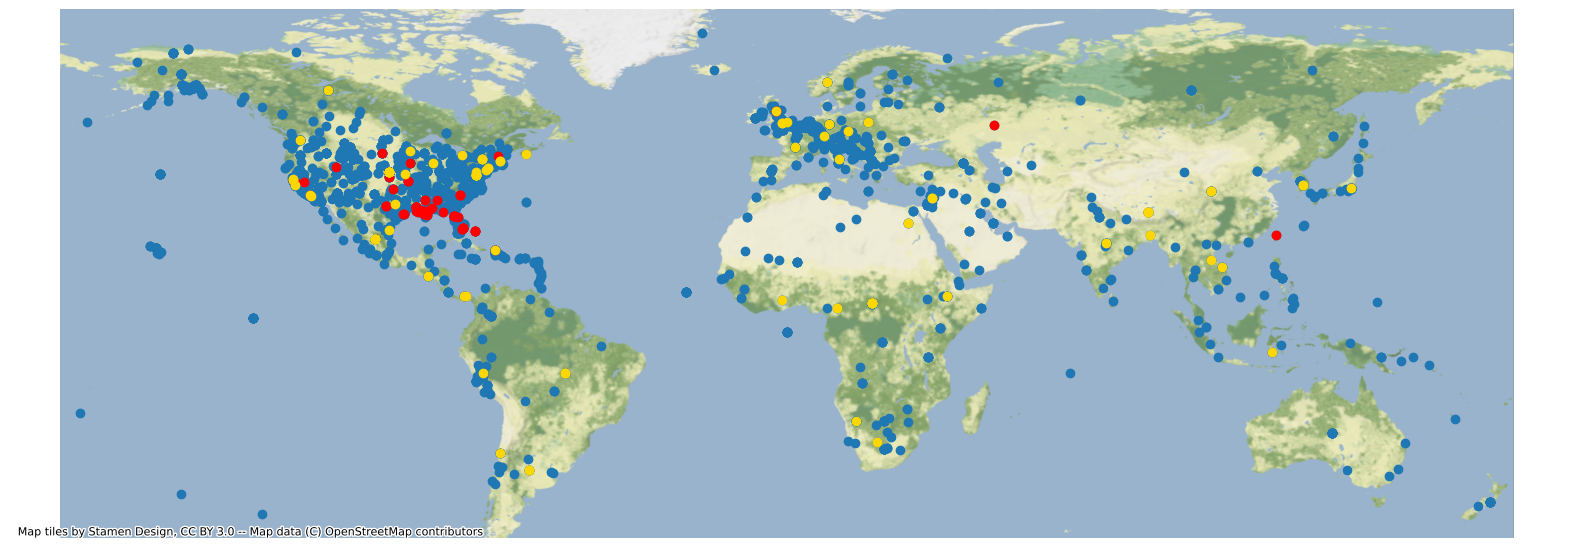

In [20]:
f, ax = plt.subplots(1, figsize=(20, 10))
coordinates.plot(
    #column='topic_id',
    #cmap="viridis",
    #scheme="quantiles",
    #k=5,
    #edgecolor="white",
    #linewidth=0.0,
    #alpha=0.75,
    #legend=True,
    #legend_kwds={"loc": 2},
    ax=ax,
)

coordinates[coordinates['topic_id']=="d04"].plot(
    #column='topic_id',
    #cmap="viridis",
    #scheme="quantiles",
    #k=5,
    color="red",
    #edgecolor="white",
    #linewidth=0.0,
    #alpha=0.75,
    #legend=True,
    #legend_kwds={"loc": 2},
    ax=ax,
)

coordinates[coordinates['topic_id']=="d30"].plot(
    #column='topic_id',
    #cmap="viridis",
    #scheme="quantiles",
    #k=5,
    color="gold",
    #edgecolor="white",
    #linewidth=0.0,
    #alpha=0.75,
    #legend=True,
    #legend_kwds={"loc": 2},
    ax=ax,
)

contextily.add_basemap(
    ax,
    crs=coordinates.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)
ax.set_axis_off()
f.save
plt.show()

In [44]:
coordinates.groupby(["topic_id"])[["geometry"]].count().mean()

geometry    100.266667
dtype: float64

In [49]:
coordinates.groupby(["doc"])[["geometry"]].count().mean()

geometry    10.127946
dtype: float64

In [48]:
coordinates[["geometry"]].count()

geometry    3008
dtype: int64

In [42]:
coordinates.groupby(["doc"])[["geometry"]].nunique().min()

geometry    1
dtype: int64

In [ ]:
coordinates.groupby(["doc"]).count()